In [2]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as ec
from selenium.webdriver.common.by import By
import time
from bs4 import BeautifulSoup
import re
import os

#usuario = os.getenv("usuario")
#senha = os.getenv("senha")

headers={'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}



In [ ]:
chromedriver.install()
chrome_options = Options()
# chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--log-level=3')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_experimental_option('excludeSwitches', ['enable-logging'])


In [ ]:
service = Service(executable_path=ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

url = "https://www.instagram.com/p/CqJeJ_FgFxP/"
driver.get(url)
driver.implicitly_wait(20)
driver.maximize_window()
time.sleep(3)

WebDriverWait(driver, 10).until(ec.element_to_be_clickable(
    (By.XPATH, "/html/body/div[2]/div/div/div[1]/div/div/div/div[1]/section/nav/div[2]/div/div/div[3]/div/div[2]/div[1]/a/button"))).click()

caixa_usuario = driver.find_element("xpath", "/html/body/div[2]/div/div/div[1]/div/div/div/div[1]/section/main/div/div/div[1]/div[2]/form/div/div[1]/div/label/input")
caixa_usuario.send_keys(usuario)

caixa_senha = driver.find_element("xpath", "/html/body/div[2]/div/div/div[1]/div/div/div/div[1]/section/main/div/div/div[1]/div[2]/form/div/div[2]/div/label/input")
caixa_senha.send_keys(senha)

WebDriverWait(driver, 10).until(ec.element_to_be_clickable(
    (By.XPATH, "/html/body/div[2]/div/div/div[1]/div/div/div/div[1]/section/main/div/div/div[1]/div[2]/form/div/div[3]/button"))).click() 
time.sleep(3)
WebDriverWait(driver, 10).until(ec.element_to_be_clickable(
    (By.XPATH, "/html/body/div[2]/div/div/div[1]/div/div/div/div[1]/div[1]/div[2]/section/main/div/div/div/section/div/button"))).click() 
time.sleep(2)
while True:
    try:
        WebDriverWait(driver, 10).until(ec.element_to_be_clickable(
            (By.XPATH, "/html/body/div[2]/div/div/div[1]/div/div/div/div[1]/div[1]/div[2]/section/main/div[1]/div[1]/article/div/div[2]/div/div[2]/div[1]/ul/li/div/button"))).click() 
    except Exception as error:
        print(error)
        break

inspect = '/html/body/div[2]/div/div/div[1]/div/div/div/div[1]/div[1]/div[2]/section/main/div[1]/div[1]/article/div/div[2]/div/div[2]/div[1]'
element = driver.find_element('xpath', f'{inspect}')
html_element = element.get_attribute('outerHTML')
soup = BeautifulSoup(html_element, 'html.parser')

soup

In [ ]:
lista_comentarios = soup.find_all("span","_aacl _aaco _aacu _aacx _aad7 _aade")

lista_numeros = []
lista_textos = []
for comentarios in lista_comentarios:
    numero = re.compile(r'\d+')
    numeros = numero.findall(comentarios.text)

    if len(numeros) == 1:
        lista_numeros.append(numeros[0])
        lista_textos.append(comentarios)
    else:
        lista_numeros.append(numeros)
        lista_textos.append(comentarios.text)


df = pd.DataFrame(list(zip(lista_numeros,lista_textos)), columns=['numeros','comentarios'])
print(df)
df.to_excel("comentarios.xlsx")


In [17]:
import os
from matplotlib import pyplot as plt
import mplcyberpunk

In [27]:
plt.style.use("cyberpunk")

In [11]:
def tryconvert(value, default, *types):
    for t in types:
        try:
            return t(value)
        except (ValueError, TypeError):
            continue
    return default

In [39]:
os.chdir("/home/brenno/Documentos/instagram_reels/dados")

tabela = pd.read_excel("comentarios.xlsx")

tabela = tabela['numeros']

tabela = tabela.apply(lambda x: tryconvert(x, pd.NA, int))

tabela = tabela.dropna()

tabela = tabela.apply(lambda x: x if x < 1500 else pd.NA)

tabela = tabela.dropna()

tabela = tabela.apply(lambda x: x if x > 75 else pd.NA)

tabela = tabela.dropna()


tabela.mean()

438.1071537290715

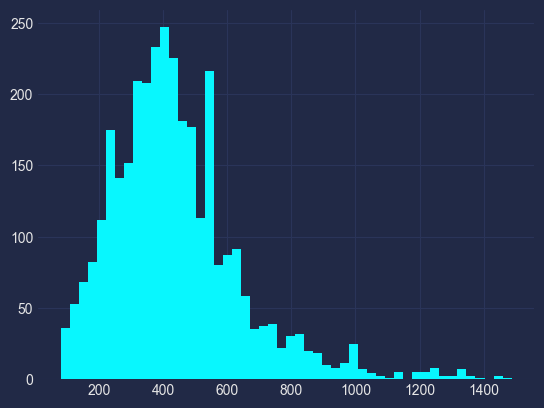

In [41]:
valores = tabela.values
plt.hist(valores, bins = 50)
plt.show()

In [29]:
tabela

0       539
1       429
2       312
3       323
4       432
       ... 
3466    285
3467    373
3468    504
3469    307
3471    381
Name: numeros, Length: 3351, dtype: object